# Bài tập Tiền xử lý dữ liệu - Phần 1

**Bộ dữ liệu Online Retail mô tả tình hình kinh doanh của một doanh nghiệp bán hàng Online mà bạn đã được làm quen từ buổi 1. Yêu cầu:**

In [14]:
import pandas as pd 
import numpy as np 
data = pd.read_csv('OnlineRetail.csv', encoding = 'ISO-8859-1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
data.groupby('Country')['CustomerID'].count()

Country
Australia                 1259
Austria                    401
Bahrain                     17
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      7485
European Community          61
Finland                    695
France                    8491
Germany                   9495
Greece                     146
Hong Kong                    0
Iceland                    182
Israel                     250
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1480
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


In [6]:
data['StockCode'].unique().size

4070

In [7]:
data['Description'].unique().size

4224

In [11]:
data.groupby('StockCode')['Description'].count()

StockCode
10002           71
10080           23
10120           30
10123C           3
10123G           0
                ..
gift_0001_20    10
gift_0001_30     7
gift_0001_40     3
gift_0001_50     4
m                1
Name: Description, Length: 4070, dtype: int64

In [14]:
data[data['StockCode']=='gift_0001_20']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,1/5/2011 14:44,17.02,NaN,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,1/13/2011 9:30,16.67,NaN,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2/15/2011 17:51,16.67,NaN,United Kingdom
161388,550474,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,4/18/2011 13:58,16.67,NaN,United Kingdom
163440,550542,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,4/19/2011 11:37,16.67,NaN,United Kingdom
228807,556955,gift_0001_20,to push order througha s stock was,10,6/16/2011 9:04,0.00,NaN,United Kingdom
234137,557500,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,6/20/2011 15:27,16.67,NaN,United Kingdom
239899,558068,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,6/24/2011 15:51,16.67,NaN,United Kingdom
291036,562420,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,8/4/2011 16:38,16.67,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,10/31/2011 14:41,16.67,NaN,United Kingdom


## Câu 1:

**Phát hiện các cột chứa dữ liệu khuyết thiếu**  
**Số lượng dòng khuyết thiếu là bao nhiêu**  
**Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao**  
**Thực hiện xử lý giá trị khuyết thiếu:**  
**Xóa các dòng chứa NaN tại cột Description**  
**Thay thế giá trị khuyết thiếu của thuộc tính CustomerID bằng giá trị mặc định “GUEST”**  

In [13]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data[data['Description'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [9]:
data[data['CustomerID'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [11]:
data[(data['CustomerID'].isna()==True) & (data['Description'].isna()==True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [15]:
data[(data['Description'].isnull())&(data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [15]:
data = data.dropna(subset='Description')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


In [16]:
values = {'CustomerID':'Guest'}
data=data.fillna(value=values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  object 
 7   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.1+ MB


In [49]:
data1['CustomerID']=data['CustomerID'].fillna('GUEST')
data1.info()

C:\Users\Hamilton\AppData\Local\Temp\ipykernel_26668\633646897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CustomerID']=data['CustomerID'].fillna('GUEST')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  object 
 7   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.1+ MB


In [46]:
data1[data1.loc[:,'CustomerID'].isna()==True] = 'Guest'
data1.info()

C:\Users\Hamilton\AppData\Local\Temp\ipykernel_26668\1821907361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[data1.loc[:,'CustomerID'].isna()==True] = 'Guest'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    540455 non-null  object
 1   StockCode    540455 non-null  object
 2   Description  540455 non-null  object
 3   Quantity     540455 non-null  object
 4   InvoiceDate  540455 non-null  object
 5   UnitPrice    540455 non-null  object
 6   CustomerID   540455 non-null  object
 7   Country      540455 non-null  object
dtypes: object(8)
memory usage: 37.1+ MB


In [40]:
data1.loc[data1['CustomerID'].isna().index,'CustomerID'] = 'Guest'
data1.info()

C:\Users\Hamilton\AppData\Local\Temp\ipykernel_26668\259248685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.loc[data1['CustomerID'].isna().index,'CustomerID'] = 'Guest'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  object 
 7   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 53.2+ MB


In [48]:
#Khai báo thư viện
import pandas as pd
import numpy as np

#Nhập dữ liệu
data = pd.read_csv('~/CodeGym/Slide 1/OnlineRetail.csv', header=0, encoding = "ISO-8859-1")
print('*'*20, "Nhập dữ liệu thành công", '*'*20)
display(data)
data.info()

******************** Nhập dữ liệu thành công ********************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
#Các cột và dòng chứa giá trị khuyết thiếu là
a = 0
print('Các cột chứa dữ liệu khuyết thiếu là:')
for index, column in enumerate(data.columns):
    temp = data.loc[:,column].isnull()
    if temp.sum() > 0:
        print('Cột ', data.columns[index], ' chứa ' , temp.sum() , ' giá trị KT')
        a = a + temp.sum()
        # print(temp[temp[:]==True].index.tolist()) #In ra danh sách dòng chứa null
print('Tổng số lượng giá trị khuyết thiếu là: ', a)

Các cột chứa dữ liệu khuyết thiếu là:
Cột  Description  chứa  1454  giá trị KT
Cột  CustomerID  chứa  135080  giá trị KT
Tổng số lượng giá trị khuyết thiếu là:  136534


In [ ]:
# Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao
# Không nên xóa vì có thể ảnh hưởng tới kế toán, bảo hành
# Cột Description là mô tả sản phẩm, nếu thiếu thì có thể đối soát lại với Stockcode
# Cột CustomerID thiếu, nếu khách yêu cầu đổi trả thì có thể đối chiếu lại với InvoiceNumber

In [44]:
#Thực hiện xử lý giá trị khuyết thiếu: 
#Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

# data.loc[data.loc[:,'Description'].isnull()==True,'Description'] = 'Không biết'
data['Description'] = data['Description'].fillna('Không biết')
# data.loc[:,'Description'][data.loc[:,'Description'].isnull()==True] = 'Không biết' #Warning
data[data.loc[:,'Description'] == 'Không biết']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Không biết,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,Không biết,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,Không biết,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,Không biết,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,Không biết,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,Không biết,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,Không biết,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,Không biết,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,Không biết,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [32]:
# fillna(value= {"A": 0, "B": 1, "C": 2, "D": 3} )
# values = {'Description': 'không biết'}
data.fillna(value= {"Description":'không biết', "CustomerID":'không biết'}, inplace=True)
data[data.loc[:,'Description'] == 'không biết']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,không biết,56,12/1/2010 11:52,0.0,không biết,United Kingdom
1970,536545,21134,không biết,1,12/1/2010 14:32,0.0,không biết,United Kingdom
1971,536546,22145,không biết,1,12/1/2010 14:33,0.0,không biết,United Kingdom
1972,536547,37509,không biết,1,12/1/2010 14:33,0.0,không biết,United Kingdom
1987,536549,85226A,không biết,1,12/1/2010 14:34,0.0,không biết,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,không biết,-2,12/7/2011 18:26,0.0,không biết,United Kingdom
535326,581203,23406,không biết,15,12/7/2011 18:31,0.0,không biết,United Kingdom
535332,581209,21620,không biết,6,12/7/2011 18:35,0.0,không biết,United Kingdom
536981,581234,72817,không biết,27,12/8/2011 10:33,0.0,không biết,United Kingdom


## Câu 2:

**Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice**  
**Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch**  
**Mô tả thông tin của bộ dữ liệu trên và nhận xét**

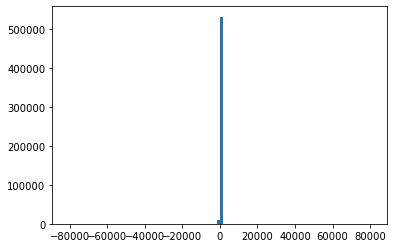

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.kdeplot(data['Quantity'])
plt.hist(data['Quantity'], bins=100)
plt.show()

In [18]:
data4 = data.loc[data.loc[:,'Quantity']>0,:]
data4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


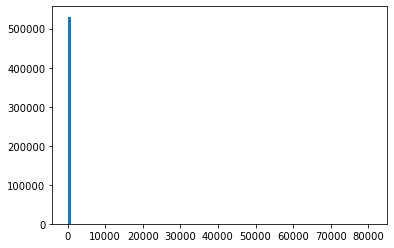

In [19]:
plt.hist(data4['Quantity'], bins=100)
plt.show()

upper bound quantity:28.0
lower bound quantity:-17.0
9         32
31        48
44        36
46        80
65        32
          ..
541835    40
541865    40
541866    36
541867    72
541868    48
Name: Quantity, Length: 26965, dtype: int64
26965


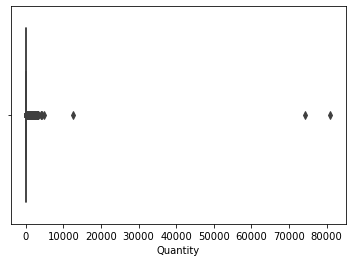

In [40]:
# ngoại lai của thuộc tính Quantity:
Q1_quantity=data4.loc[:,'Quantity'].quantile(0.25, 'linear')
Q3_quantity=data4.loc[:,'Quantity'].quantile(0.75)
IQR_quantity=Q3_quantity-Q1_quantity
upper_quantity=(Q3_quantity+2*IQR_quantity)
print(f'upper bound quantity:{upper_quantity}')
lower_quantity=(Q1_quantity-2*IQR_quantity)
print(f'lower bound quantity:{lower_quantity}')

data5 = data4.loc[:,:]\
      [(data4['Quantity']<upper_quantity)&(data4['Quantity']>lower_quantity)]

sns.boxplot(x=data4['Quantity']) 
print(data4.loc[:,'Quantity']\
      [(data4['Quantity']>upper_quantity)|(data4['Quantity']<lower_quantity)])
print(data4.loc[:,'Quantity']\
      [(data4['Quantity']>upper_quantity)|(data4['Quantity']<lower_quantity)].count())

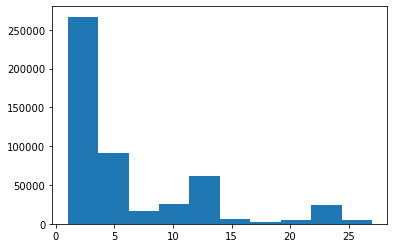

In [41]:
plt.hist(data5['Quantity'], bins=10)
plt.show()

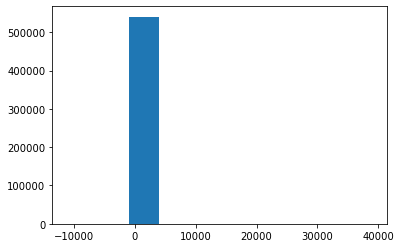

In [42]:
plt.hist(data['UnitPrice'], bins=10)
plt.show()

In [44]:
data6 = data5.loc[data5.loc[:,'UnitPrice']>0,:]
data6

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


upper bound quantity:8.45
lower bound quantity:-3.0700000000000003
16         9.95
45        18.00
151       14.95
152       14.95
153       16.95
          ...  
541768    18.00
541786    11.95
541831     8.50
541849     9.95
541892     8.95
Name: UnitPrice, Length: 37694, dtype: float64
37694


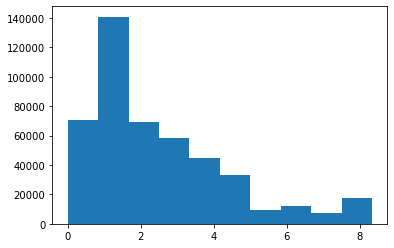

In [46]:
# ngoại lai của thuộc tính UnitPrice:
Q1_quantity=data6.loc[:,'UnitPrice'].quantile(0.25, 'linear')
Q3_quantity=data6.loc[:,'UnitPrice'].quantile(0.75)
IQR_quantity=Q3_quantity-Q1_quantity
upper_quantity=(Q3_quantity+1.5*IQR_quantity)
print(f'upper bound quantity:{upper_quantity}')
lower_quantity=(Q1_quantity-1.5*IQR_quantity)
print(f'lower bound quantity:{lower_quantity}')

data7 = data6.loc[:,:]\
      [(data6['UnitPrice']<upper_quantity)&(data6['UnitPrice']>lower_quantity)]

# sns.boxplot(x=data6['UnitPrice']) 
print(data6.loc[:,'UnitPrice']\
      [(data6['UnitPrice']>upper_quantity)|(data6['UnitPrice']<lower_quantity)])
print(data6.loc[:,'UnitPrice']\
      [(data6['UnitPrice']>upper_quantity)|(data6['UnitPrice']<lower_quantity)].count())

plt.hist(data7['UnitPrice'], bins=10)
plt.show()

In [47]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465373 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    465373 non-null  object 
 1   StockCode    465373 non-null  object 
 2   Description  465373 non-null  object 
 3   Quantity     465373 non-null  int64  
 4   InvoiceDate  465373 non-null  object 
 5   UnitPrice    465373 non-null  float64
 6   CustomerID   465373 non-null  object 
 7   Country      465373 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 32.0+ MB


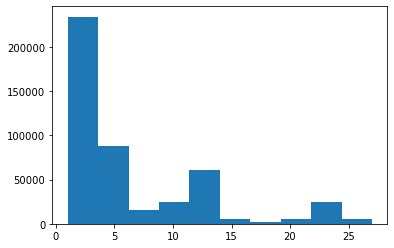

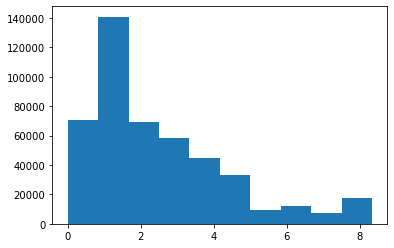

In [48]:
plt.hist(data7['Quantity'], bins=10)
plt.show()

plt.hist(data7['UnitPrice'], bins=10)
plt.show()

upper bound quantity:23.5
lower bound quantity:-12.5
9         32
26        24
27        24
30        24
31        48
          ..
541876    24
541882    24
541883    25
541891    24
541892    24
Name: Quantity, Length: 58619, dtype: int64
58619


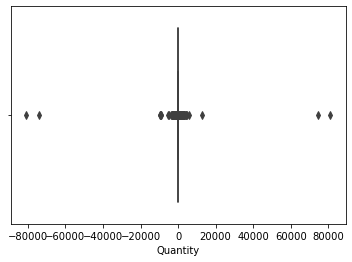

In [55]:
import seaborn as sns
# ngoại lai của thuộc tính Quantity:
Q1_quantity=data.loc[:,'Quantity'].quantile(0.25, 'linear')
Q3_quantity=data.loc[:,'Quantity'].quantile(0.75)
IQR_quantity=Q3_quantity-Q1_quantity
upper_quantity=(Q3_quantity+1.5*IQR_quantity)
print(f'upper bound quantity:{upper_quantity}')
lower_quantity=(Q1_quantity-1.5*IQR_quantity)
print(f'lower bound quantity:{lower_quantity}')

sns.boxplot(x=data['Quantity']) 
print(data.loc[:,'Quantity']\
      [(data['Quantity']>upper_quantity)|(data['Quantity']<lower_quantity)])
print(data.loc[:,'Quantity']\
      [(data['Quantity']>upper_quantity)|(data['Quantity']<lower_quantity)].count())

upper bound unitprice:8.45
lower bound unitprice:-3.0700000000000003
16         9.95
45        18.00
65        10.95
141       27.50
151       14.95
          ...  
541768    18.00
541786    11.95
541831     8.50
541849     9.95
541892     8.95
Name: UnitPrice, Length: 39627, dtype: float64


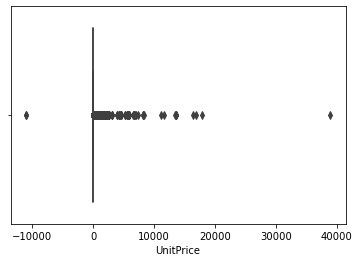

In [56]:
# ngoại lai của thuộc tính unit price:
Q1_unitprice=data.loc[:,'UnitPrice'].quantile(0.25, 'linear')
Q3_unitprice=data.loc[:,'UnitPrice'].quantile(0.75)
IQR_unitprice=Q3_unitprice-Q1_unitprice
upper_unitprice=(Q3_unitprice+1.5*IQR_unitprice)
print(f'upper bound unitprice:{upper_unitprice}')
lower_unitprice=(Q1_unitprice-1.5*IQR_unitprice)
print(f'lower bound unitprice:{lower_unitprice}')

sns.boxplot(x=data['UnitPrice']) 
print(data.loc[:,'UnitPrice'][(data['UnitPrice']>upper_unitprice)|(data['UnitPrice']<lower_unitprice)])

In [33]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
#Nhóm 1
#Chịu

In [ ]:
#Nhóm 2

In [39]:
#Nhóm 3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

data2 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data3 = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

Quantity         9.00
UnitPrice        2.88
CustomerID    2838.00
dtype: float64


C:\Users\Hamilton\AppData\Local\Temp\ipykernel_51008\2450795946.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))


        Country  CustomerID  Description  InvoiceDate  InvoiceNo  Quantity  \
0         False       False        False        False      False     False   
1         False       False        False        False      False     False   
2         False       False        False        False      False     False   
3         False       False        False        False      False     False   
4         False       False        False        False      False     False   
...         ...         ...          ...          ...        ...       ...   
541904    False       False        False        False      False     False   
541905    False       False        False        False      False     False   
541906    False       False        False        False      False     False   
541907    False       False        False        False      False     False   
541908    False       False        False        False      False     False   

        StockCode  UnitPrice  
0           False      False  
1

C:\Users\Hamilton\AppData\Local\Temp\ipykernel_51008\2450795946.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data2 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\Hamilton\AppData\Local\Temp\ipykernel_51008\2450795946.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data3 = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444108 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    444108 non-null  object 
 1   StockCode    444108 non-null  object 
 2   Description  443306 non-null  object 
 3   Quantity     444108 non-null  int64  
 4   InvoiceDate  444108 non-null  object 
 5   UnitPrice    444108 non-null  float64
 6   CustomerID   327498 non-null  float64
 7   Country      444108 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [40]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97801 entries, 9 to 541892
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    97801 non-null  object 
 1   StockCode    97801 non-null  object 
 2   Description  97149 non-null  object 
 3   Quantity     97801 non-null  int64  
 4   InvoiceDate  97801 non-null  object 
 5   UnitPrice    97801 non-null  float64
 6   CustomerID   79331 non-null  float64
 7   Country      97801 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.7+ MB


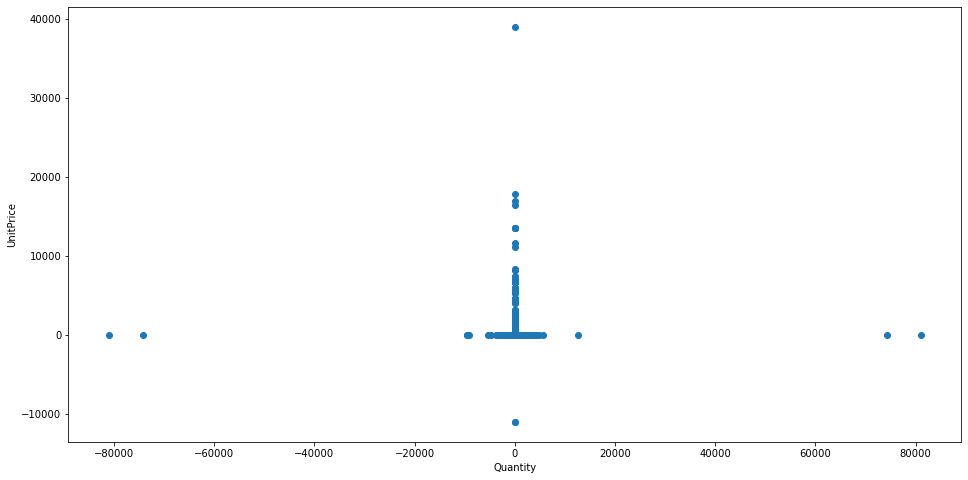

In [41]:
#Nhóm 4
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Quantity'], data['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()


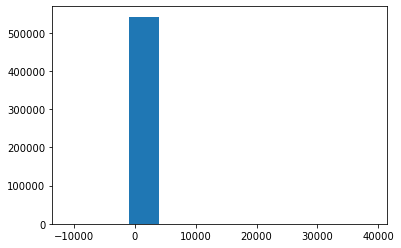

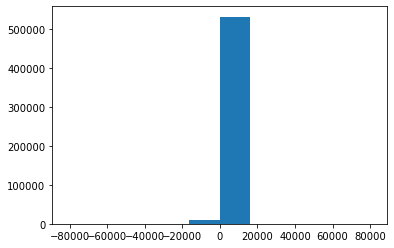

In [79]:
plt.hist(data['UnitPrice'], bins=10)
plt.show()
plt.hist(data['Quantity'], bins=10)
plt.show()

In [ ]:
#Nhóm 5

C:\Users\Hamilton\AppData\Local\Temp\ipykernel_51008\1160537206.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


,Quantity,UnitPrice,CustomerID
count,444108.000000,444108.000000,327498.000000
mean,4.803066,2.694544,15345.003670
std,4.616762,1.930320,1704.517156
min,-12.000000,0.000000,12347.000000
25%,1.000000,1.250000,14041.000000
50%,3.000000,2.080000,15287.000000
75%,8.000000,3.750000,16843.000000
max,23.000000,8.330000,18287.000000


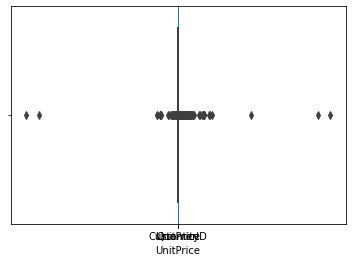

In [49]:
#Nhóm 6
import seaborn as sns
# Mô tả dữ liệu
data.describe()
# vẽ biểu đồ boxplot cho các đặc trưng
data.boxplot()
# vẽ biểu đồ box plot cho 2 cột
sns.boxplot(x=data["Quantity"])
sns.boxplot(x=data["UnitPrice"])
#Xử lý ngoại lai với IQR
# tính giá trị Q1 và Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
# tính IQR 
IQR = Q3-Q1
# lọc dữ liệu ngoại lai
data_1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
# Mô tả dữ liệu sau khi lọc
sns.boxplot(x=data_1["Quantity"])
sns.boxplot(x=data_1["UnitPrice"])
data_1.describe()

In [81]:
from scipy import stats
z_up = np.abs(stats.zscore(data.loc[:,'UnitPrice'])) #Tính điểm z-score
z_q = np.abs(stats.zscore(data.loc[:,'Quantity'])) 
print(z_up)
print(z_q)

data_up = data[(z_up<0.5)]
data_q = data[(z_q<0.5)]
print(data_up)
print(data_q)

0         0.021301
1         0.012620
2         0.019234
3         0.012620
4         0.012620
            ...   
541904    0.038871
541905    0.025952
541906    0.004766
541907    0.004766
541908    0.003502
Name: UnitPrice, Length: 541909, dtype: float64
0         0.016289
1         0.016289
2         0.007118
3         0.016289
4         0.016289
            ...   
541904    0.011224
541905    0.016289
541906    0.025460
541907    0.025460
541908    0.030045
Name: Quantity, Length: 541909, dtype: float64
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ..

In [69]:
z_up.sort_values(ascending=False).head(500)

222681    402.702398
524602    184.289918
43702     174.487909
43703     169.999370
15017     139.900289
             ...    
159710      2.254438
159703      2.254438
112232      2.252784
300335      2.251751
217360      2.248547
Name: UnitPrice, Length: 500, dtype: float64

**Một công ty mối giới bất động sản, muốn cung cấp dịch vụ tư vấn giao dịch cho khách hàng tại khu vực Đống Đa Hà Nội với loại hình nhà mặt đất. Công ty đã tiến hành thu thập thông tin của một số bất động sản ở các vị trí khác nhau: Thông tin nhân viên của công ty thu thập được gồm:   
Area: diện tích
Price: diện tích căn nhà (tính theo đơn vị tỷ đồng)  
postDate: Ngày chủ nhà giao bán trên mạng  
land_certificate: Loại giấy tờ  
house_direction: hướng nhà   
balcony_direction: Hướng ban công  
toilet: số lượng toilet  
bedroom: Số lượng phòng ngủ  
Floor: Số tầng  
Property_Type: loại nhà đất (mặt phố hoặc trong ngõ)**

## Câu 3:

**Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu  
Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá**

## Câu 4:

**Thực hiện xử lý giá trị khuyết thiếu:  
Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”,  
house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó**

## Câu 5:

**Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ  
Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ**

## Câu 6:

**Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR  
Thực hiện loại bỏ các dòng dữ liệu ngoại lai**

## Câu 7:

**Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp:  
min-max scaling,  
z- score scaling,  
Robust scaling,  
và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa**